Ref: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb

In [1]:
import tensorflow as tf
import numpy as np
x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


2022-02-26 15:54:29.479158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-26 15:54:29.479424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
x = tf.random.normal(shape=(3,1), mean=5.0, stddev=2.0)
print(x)

tf.Tensor(
[[3.1190164]
 [4.619486 ]
 [6.6986685]], shape=(3, 1), dtype=float32)


In [3]:
x = tf.random.uniform(shape=(3,2), minval=0, maxval=10)
print(x)

tf.Tensor(
[[0.1559484  4.8966193 ]
 [4.186747   0.21175623]
 [6.2345695  2.0305765 ]], shape=(3, 2), dtype=float32)


In [4]:
# x[0,0] = 1
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# Untitled-1.ipynb Cell 4' in <module>
# ----> 1 x[0,0] = 1

# TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignmenta

In [5]:
v1 = tf.Variable(initial_value=7)
print(v1)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>


In [6]:
v1.assign_add(4)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=11>

In [7]:
v1.assign_sub(3)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=8>

In [8]:
v1*v1

<tf.Tensor: shape=(), dtype=int32, numpy=64>

In [9]:
v1=v1**2
print(v1)

tf.Tensor(64, shape=(), dtype=int32)


In [10]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    res = tf.square(input_var)
grad = tape.gradient(res, input_var)
print(f"The gradient of x^2 is 2x, so for input = {input_var.read_value()}, the gradient has been caluclated to be {grad}")

The gradient of x^2 is 2x, so for input = 3.0, the gradient has been caluclated to be 6.0


In [11]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        pos = 4.9 * time**2
    speed = inner_tape.gradient(pos, time)
acc = outer_tape.gradient(speed, time)
print(f" s = ut + .5 a*t^2 brings us to a speed of {speed} and acceleration of {acc} given time {time.read_value()}")

 s = ut + .5 a*t^2 brings us to a speed of 0.0 and acceleration of 9.800000190734863 given time 0.0


Building a simple linear Classifier from Scratch using TF

In [12]:
# 1. Generating the data & plotting it.
num_samples_per_class = 1000 
pos_samples = tf.random.normal(shape=(num_samples_per_class,2), mean = 3.0, stddev=2.0).numpy()
neg_samples = tf.random.normal(shape=(num_samples_per_class,2), mean = 8.0, stddev=2.0).numpy()

inputs = np.vstack((pos_samples, neg_samples)).astype(np.float32)
targets = np.vstack((np.ones((num_samples_per_class, 1), dtype="float32"),
                    np.zeros((num_samples_per_class,1), dtype="float32")))


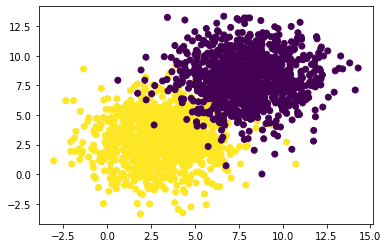

In [13]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [91]:
print(f"Sample input = {inputs[0:3,:]}")
print(f"Corresponding sample labels = {targets[0:3]}")

Sample input = [[3.2414281 4.612123 ]
 [1.183374  3.4669476]
 [4.67483   2.925737 ]]
Corresponding sample labels = [[1.]
 [1.]
 [1.]]


In [146]:
# 2. Creating the linear classifier variables
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))
# print(f"Parameters: W = {W} \n b = {b}")
# 3. Forward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

# 4. Loss function
def square_loss(targets, predictions, verbose=0):
    per_sample_loss = tf.square(targets - predictions)
    if verbose == 1:
        print(f"Per sample loss array = {per_sample_loss}")
    reduced = tf.reduce_mean(per_sample_loss)
    # print(f"Reduced mean loss = {reduced}")
    return reduced
    

In [147]:
# 5. The training step function

learning_rate = 0.01

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)

        # print(f"First 3 inputs = {inputs[0:3]}")
        # print(f"First 3 preds = {predictions[0:3]}")

        loss = square_loss(predictions, targets,0)
        # print(f"Squared Loss inside training step = {loss}")
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    # x = np.linspace(-10, 10, 100)
    # y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
    # plt.plot(x, y, "-r")
    # plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
    # # plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
    # plt.show()
    print(f"End of 1 training step. Loss = {loss}, W = {W} , b = {b}")
    return loss, W, b, predictions

Iteration 0
End of 1 training step. Loss = 129.77491760253906, W = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.5232748 ],
       [-0.56823254]], dtype=float32)> , b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5850601], dtype=float32)>
Iteration 1
End of 1 training step. Loss = 42.94058609008789, W = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.28924382],
       [0.25199658]], dtype=float32)> , b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.70417494], dtype=float32)>
Iteration 2
End of 1 training step. Loss = 14.279508590698242, W = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.17982951],
       [-0.21759844]], dtype=float32)> , b = <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.64018065], dtype=float32)>
Iteration 3
End of 1 training step. Loss = 4.818996429443359, W = <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.

<AxesSubplot:>

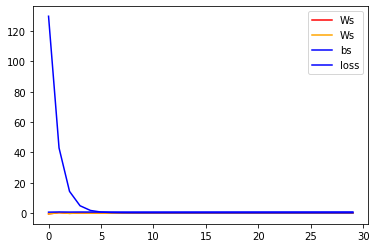

In [148]:
# 6. The batch traning loop
import seaborn as sns
W1s = []
W2s = []
bs = []
losses = []
num_epochs = 30
for step in range(num_epochs):
    print("======================")
    print(f"Iteration {step}")
    loss, W_Ret, b_ret, preds  = training_step(inputs, targets)
    losses.append(loss.numpy())
    W1s.append(W_Ret.numpy()[0][0])
    W2s.append(W_Ret.numpy()[1][0])
    bs.append(b_ret.numpy()[0])
    # print(f"Loss at step {step} : {loss:.4f}")
    print("======================")

# Wsn = [ w.numpy()[0][0] for w in Ws]
# bsn = [b.numpy()[0] for b in bs]
# lossesn = [l.numpy() for l in losses]
sns.lineplot(x=range(len(W1s)), y=W1s, color='red', label="Ws")
sns.lineplot(x=range(len(W2s)), y=W2s, color='orange', label="Ws")
sns.lineplot(x=range(len(bs)), y=bs, color='blue', label="bs")
sns.lineplot(x=range(len(losses)),y=losses, color='blue', label="loss")

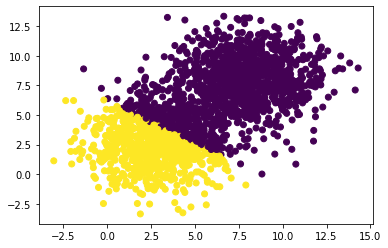

In [149]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

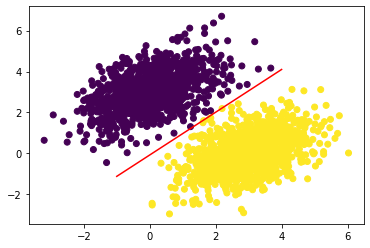

In [76]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

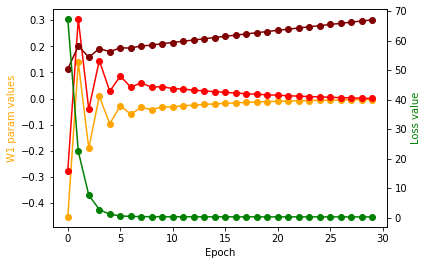

In [128]:
import matplotlib.pyplot as plt

x_axis = range(len(losses))
y1_axis = W1s
y2_axis = losses

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_axis, y1_axis, 'o-', color="orange")
ax1.plot(x_axis, W2s, 'o-', color="red")
ax1.plot(x_axis, bs, 'o-', color="maroon")
ax2.plot(x_axis, y2_axis, 'o-', color="green")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("W1 param values", color="orange")
ax2.set_ylabel("Loss value", color="green")

plt.show()

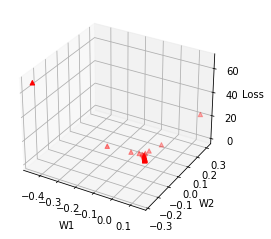

In [141]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)


xs = np.array(W1s, dtype=np.float32)
ys = np.array(W2s, dtype=np.float32)
zs = np.array(losses, dtype=np.float32)
ax.scatter(xs, ys, zs, c='r', marker='^')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('Loss')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

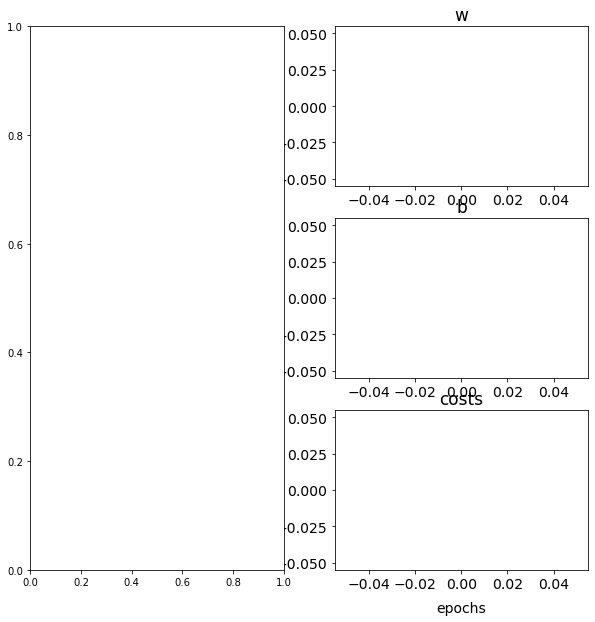

In [151]:
import celluloid
from celluloid import Camera
# Define which epochs/data points to plot
a=np.arange(0,num_epochs,1).tolist()
# b=np.arange(50,100,5).tolist()
# c=np.arange(100,12000,200).tolist()
# p = a+b+c # points we want to plot
# xs = np.array(W1s, dtype=np.float32)
# ys = np.array(W2s, dtype=np.float32)
# zs = np.array(losses, dtype=np.float32)
# Turn lists into arrays
w = np.array(W1s, dtype=np.float32).flatten()
b = np.array(bs, dtype=np.float32).flatten()
c = np.array(losses, dtype=np.float32).flatten()
ys_list= predictions # store arrays of predicted y-values for xs ( -> plot regression line!) 
cl_list = predictions # list contains predicted y-values for x_train ( -> plot connecting lines!) 

x_train = inputs[0:10,]
y_train = targets[0:10]
# ys = np.array(ys_list) 
p=np.array(a)

# Create first animation: 
fig = plt.figure(figsize=(10,10)) # create figure
labelsize_ = 14
camera = Camera(fig)  # create camera
for i in p:
    ax1=fig.add_subplot(3, 2, 2)  
    ax1.plot(w[0:i], color='blue', linestyle="dashed", alpha=0.5)
    ax1.set_title("w", fontsize=17)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis. 
    ax2.plot(b[0:i], color='red', linestyle="dashed", alpha=0.5)
    ax2.set_title("b", fontsize=17)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax3=fig.add_subplot(3, 2, 6, sharex=ax1) 
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_title("costs", fontsize=17)
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=14, labelpad=10)

    ax0=fig.add_subplot(1, 2, 1) # plot fit
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(),
                 color='r', label=str(i))  # set legend; flatten arrays to get plots!
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])

    plt.tight_layout()
    camera.snap() # take snapshot after each frame/iteration
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500) # create animation 
animation.save('SimpleLinReg_1.gif', writer = 'imagemagick') # save animation 

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [6]:
x =tf.random.uniform(shape=(1,2))
print(x)

tf.Tensor([[0.01092422 0.46804821]], shape=(1, 2), dtype=float32)


In [87]:
type(pos_samples.numpy()[1:5])

numpy.ndarray

In [88]:
type(positive_samples[1:5])

numpy.ndarray

In [25]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [26]:
print(f"Sample input = {inputs[0:3,:]}")
print(f"Corresponding sample labels = {targets[0:3]}")

Sample input = [[ 0.93738145  2.6034849 ]
 [-0.14088388  3.1042006 ]
 [-0.9111804   2.6694667 ]]
Corresponding sample labels = [[0.]
 [0.]
 [0.]]


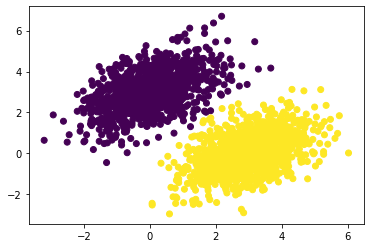

In [64]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [65]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [66]:
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [67]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [68]:
for step in range(400):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.1765
Loss at step 1: 0.1374
Loss at step 2: 0.0979
Loss at step 3: 0.0879
Loss at step 4: 0.0822
Loss at step 5: 0.0773
Loss at step 6: 0.0730
Loss at step 7: 0.0690
Loss at step 8: 0.0653
Loss at step 9: 0.0620
Loss at step 10: 0.0589
Loss at step 11: 0.0561
Loss at step 12: 0.0536
Loss at step 13: 0.0512
Loss at step 14: 0.0491
Loss at step 15: 0.0471
Loss at step 16: 0.0453
Loss at step 17: 0.0436
Loss at step 18: 0.0421
Loss at step 19: 0.0407
Loss at step 20: 0.0395
Loss at step 21: 0.0383
Loss at step 22: 0.0372
Loss at step 23: 0.0363
Loss at step 24: 0.0354
Loss at step 25: 0.0346
Loss at step 26: 0.0338
Loss at step 27: 0.0331
Loss at step 28: 0.0325
Loss at step 29: 0.0319
Loss at step 30: 0.0314
Loss at step 31: 0.0309
Loss at step 32: 0.0305
Loss at step 33: 0.0301
Loss at step 34: 0.0297
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0288
Loss at step 38: 0.0285
Loss at step 39: 0.0283
Loss at step 40: 0.0280
Loss at step 41: 0.0278
Lo

TypeError: Variable is unhashable. Instead, use variable.ref() as the key. (Variable: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.6000025e+11],
       [1.6100205e+11]], dtype=float32)>)

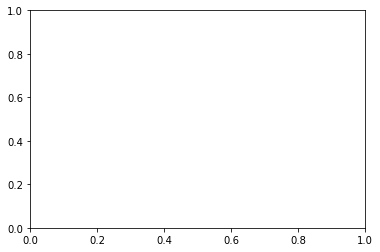

In [49]:
sns.lineplot(x=range(len(Wsn)), y=Ws, color='red', label="Ws")
sns.lineplot(x=range(len(bs)), y=bs, color='blue', label="bs")

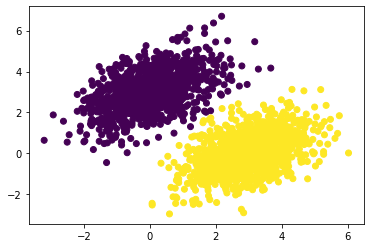

In [69]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

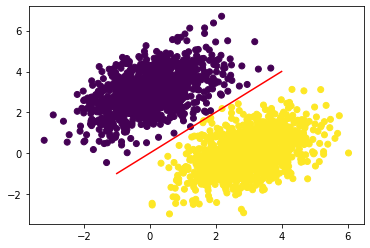

In [70]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

tensorflow not found


# Exploring Vanishing Gradients and how ReLU handles them.

<AxesSubplot:>

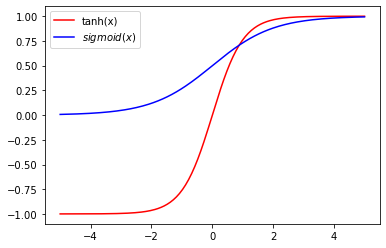

In [9]:
import seaborn as sns
import numpy as np
def sigmoid(x):
    return np.exp(activation_input)/(np.exp(activation_input)+1)
 
activation_input = np.linspace(-5, 5, num=200)
tanh_activation = np.tanh(activation_input)
sigmoid_activation = sigmoid(activation_input)
 
sns.lineplot(x=activation_input, y=tanh_activation, color='red',
label="tanh(x)")
sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue',
label="$sigmoid(x)$")

<AxesSubplot:>

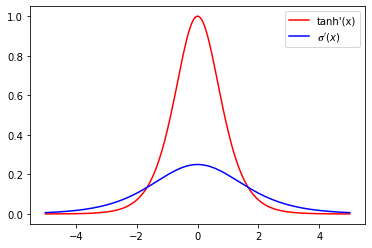

In [12]:
def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))
 
tanh_deriv = tanh_deriv(activation_input)
sigmoid_deriv = sigmoid_derivative(activation_input)
 
sns.lineplot(x=activation_input, y=tanh_deriv, color='red',
label="tanh'(x)")
sns.lineplot(x=activation_input, y=sigmoid_deriv, color='blue',
label="$𝝈'(x)$")

In [13]:
#activation function converted to code
def leaky_relu(x, alpha=0.1):
    return max(alpha*x, x)  
#the derivative of the activation function, where x is
# the original input that the activation was applied to. 
def leaky_reluP(x, alpha=0.1): 
    if x > 0:
        return 1
    else:   
        return alpha

<AxesSubplot:>

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow_base/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120648 (\N{MATHEMATICAL BOLD ITALIC SMALL SIGMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


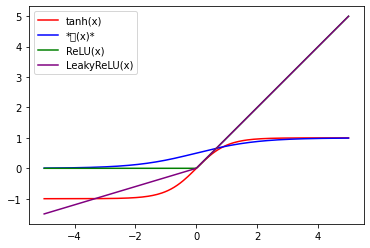

In [15]:
activation_input = np.linspace(-5, 5, num=200)
relu_activation = np.maximum(0,activation_input)
leaky_relu_activation = np.maximum(0.3*activation_input,activation_input)
 
sns.lineplot(x=activation_input, y=tanh_activation, color='red',
label="tanh(x)")
sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue',
label="*𝝈(x)*")
sns.lineplot(x=activation_input, y=relu_activation, color='green',
label="ReLU(x)")
sns.lineplot(x=activation_input, y=leaky_relu_activation, color='purple',
label="LeakyReLU(x)")

<AxesSubplot:>

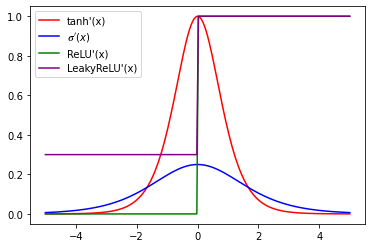

In [18]:
relu_deriv = 1.0*(activation_input > 0)
leaky_deriv = 1.0*(activation_input > 0) + 0.3*(activation_input <= 0)
 
sns.lineplot(x=activation_input, y=tanh_deriv, color='red',
label="tanh'(x)")
sns.lineplot(x=activation_input, y=sigmoid_deriv, color='blue',
label="$𝝈'(x)$")
sns.lineplot(x=activation_input, y=relu_deriv, color='green',
label="ReLU'(x)")
sns.lineplot(x=activation_input, y=leaky_deriv, color='purple',
label="LeakyReLU'(x)")